# Analyzing results

I will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this I will use the `numpy` and `matplotlib.pyplot` packages

In [3]:
# Importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
# different styles are predefined that give different appearance to the plots.
# This one emulates the style of the figures you'll find on statisical 
# analysis news site fivethirtyeight.com
plt.style.use('fivethirtyeight')

In [6]:
# reading data stored in results.dat

file_name = 'results.dat'

# np.loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)

all_data = np.loadtxt(file_name, skiprows=1, unpack=True)

h_step = all_data[0]
analytic = all_data[1]
three_point = all_data[2]
five_point = all_data[3]
# Each one of these is a numpy array that contains one of the columns in the results.dat file.
# This will allows us to make operations on the extracted data

### Plotting the derivatives first

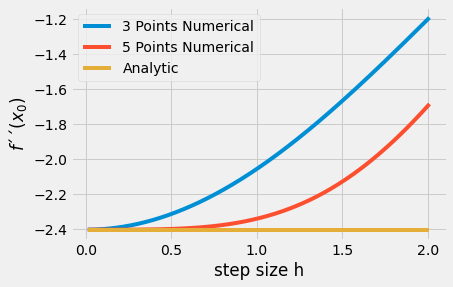

In [7]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
h_step = all_data[0]
analytic = all_data[1]
three_point = all_data[2]
five_point = all_data[3]
plt.plot(h_step, three_point, label='3 Points Numerical')
plt.plot(h_step, five_point, label='5 Points Numerical')
plt.plot(h_step, analytic, label='Analytic')
plt.xlabel('step size h')
# Strings can take LaTeX syntaxis and interpret it correctly by putting an 'r' right before it
plt.ylabel(r'$f´´(x_0)$')
# legend displays the labels given in each plot
plt.legend()
plt.show()

### Plotting the errors
Now we will plot the error of the numerical formulas

In [8]:

three_point_error = np.absolute(analytic - three_point)
five_point_error = np.absolute(analytic - five_point)

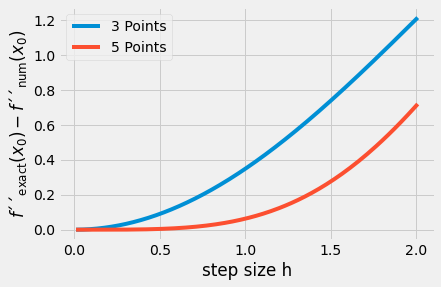

In [9]:
plt.plot(h_step, three_point_error, label='3 Points')
plt.plot(h_step, five_point_error, label='5 Points')
plt.xlabel('step size h')
plt.ylabel(r'$f´´_{\rm exact}(x_0) - f´´_{\rm num}(x_0)$')
plt.legend()
plt.show()

All I did was shift everything down to the $y=0$ axis. Didn't much information out of it.

I expect the error $\Delta f''$ to go as a power of the step size $h$. 

$$ \Delta f'' = A h^n, $$

were $A$ is just some constant. Taking a logarithm on both sides of the equation results in

$$ \log(\Delta f'') = \log(A h^n) = \log(h^n) + \log(A) = n \log(h) + C,$$

where $C$ is just a constant renaming $\log(A)$. Therefore a log-log plot of the error should show a straight line. Let's see if that's the case

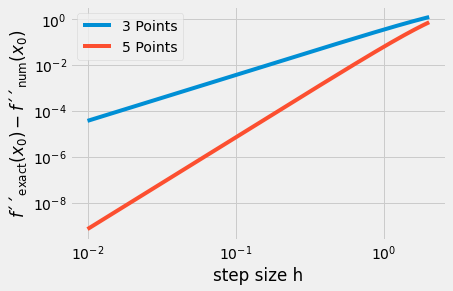

In [10]:

plt.loglog(h_step, three_point_error, label='3 Points')
plt.loglog(h_step, five_point_error, label='5 Points')
plt.xlabel('step size h')
plt.ylabel(r'$f´´_{\rm exact}(x_0) - f´´_{\rm num}(x_0)$')
plt.legend()
plt.show()

The error goes as $h^2$ for the 3 points formula and as $h^4$ for the five points formula. Therefore, the slopes should be 2 and 4. Tha can be verified with a simple linear regression

## Analyzing the data

There's several implementations of linear regression in python. We will use `linregress` from `scipy.stats`. You should check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [11]:
# Importing only the stats package
from scipy import stats

In [12]:

import numpy as np 
h_step = all_data[0]
analytic = all_data[1]
three_point = all_data[2]
five_point = all_data[3]
log_h_step = np.log(h_step)
log_three_point_error = np.log(three_point_error)
log_five_point_error = np.log(five_point_error) 
result = stats.linregress(log_h_step, log_three_point_error) 
print(result.slope) 
result = stats.linregress(log_h_step, log_five_point_error) 
print(result.slope)



1.9829326883743545
3.958695602878704


Here the slops are exactly what we expect. We have also proven that for some step size value we can see that the absolute value of the difference between numerical and analytical gives us $h^n$